# CASE STUDY: INVESTMENT

## Number of fundings

## QUESTION 1

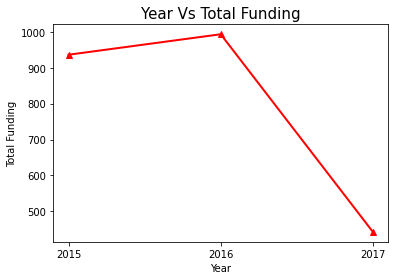

2015 936
2016 993
2017 443


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding - startup_funding.csv')
df['Date'] = df['Date'].str.replace('22/01//2015','22/01/2015')
df['Date'] = df['Date'].str.replace('[\/ \. \-]',',',regex=True)
date = df['Date'].str.split(',',expand=True)

freq = date[2].value_counts()
freq.sort_index(inplace=True)
x = freq.index
y = freq.values

plt.plot(x,y,marker='^',color='red',linewidth=2)
plt.title('Year Vs Total Funding', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.show()

for i in range(len(freq)):
    print(x[i],y[i])





## Top indidan Cities

## QUESTION 2

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


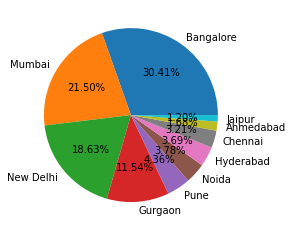

In [5]:
# Open and read data file as specified in the question
# Print the required output in given format

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("startup_funding - startup_funding.csv",skipinitialspace=True)
data.head()
#data.info()
#total rows =2372
#data.CityLocation.isnull().sum()
#total 179 missing values
#data.CityLocation.unique()
data['CityLocation'].dropna(inplace=True)

data.CityLocation.replace("bangalore","Bangalore",inplace=True)
data.CityLocation.replace("Delhi","New Delhi",inplace=True)

_data_city=list((data.CityLocation.value_counts().index))
_data_value=list((data.CityLocation.value_counts().values))

j=0
for i in _data_city[:10]:
    for k in  _data_city[10:]:
        if i in k.split('/')[0].strip():
            a=_data_city.index(k)
            _data_value[j]+=_data_value[a]
            
    j+=1

_data_city=_data_city[:10]
_data_value=_data_value[:10]
l=list(zip(_data_city,_data_value))
for i in l:
    print(i[0],i[1])
plt.pie(_data_value,labels=_data_city,autopct="%.2f%%")
plt.show()

## Funding Amount

## QUESTION 3

In [202]:
import numpy as np
import pandas as pd


dict_cities = {}
#Obtaining the city
list_city = []
city_data = pd.read_csv('startup_funding - startup_funding.csv')
city_data['CityLocation'] = city_data['CityLocation'].str.title()
city_data['CityLocation'] = city_data['CityLocation'].fillna('Bangalore')
city_location = city_data['CityLocation']
np_location = np.array(city_location)
bool_location = np.where(np_location == 'Delhi')
np_location[bool_location] = 'New Delhi'

for i in np_location:
    if '/' in i:
        x = i.split('/')
        list_city.append(x[0])
    else:
        list_city.append(i)       
np_cities = np.array(list_city)

## Calculation of percentage 
city_data['AmountInUSD'] = city_data['AmountInUSD'].str.replace('[\,]','',regex=True).astype(float)
city_data['AmountInUSD'] = city_data['AmountInUSD'].fillna(0)
city_data['AmountInUSD'] = city_data['AmountInUSD'].astype(int)
amount=city_data['AmountInUSD']
total_amount = city_data['AmountInUSD'].sum()
np_amount = np.array(amount)
np_amount =((np_amount/total_amount)*100)
np_amount = np.round(np_amount,2)


for i in np_cities:
    max_index = np_amount.argmax()
    dict_cities[i] = dict_cities.get(i,np_amount[max_index])+np_amount[max_index]
    np_amount = np.delete(np_amount,max_index)
    np_cities = np.delete(np_cities,max_index)
    
dict_cities_sorted = sorted(dict_cities,key=dict_cities.get,reverse=True)


k = 0
for i in dict_cities_sorted:
    if k < 10:
        print(i,format(dict_cities[i],'.2f'))
        k = k + 1
    else:
        break;

Bangalore 43.15
Mumbai 31.57
New Delhi 15.86
Hyderabad 10.16
Gurgaon 9.83
Ahmedabad 4.97
Noida 4.83
Pune 4.05
Kolkata 1.74
Chennai 0.90


## INVESTMENT TYPE

## QUESTION 4

Private Equity 98.14
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


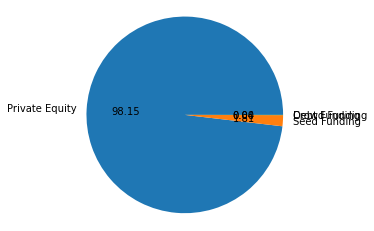

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
def each_fund(investment,total_amount):
    each_amount = amount[investment_data == investment]
    each_amount = each_amount.sum()
    percentage = round((each_amount/total_amount)*100,3)
    return percentage

    
x = []
y = []
explode=[0.2, 0.1, 0.2, 0.1]
df = pd.read_csv('startup_funding - startup_funding.csv')
investment_data= df['InvestmentType']
investment_data = investment_data.str.replace('Crowd funding','Crowd Funding')
investment_data = investment_data.str.replace('SeedFunding','Seed Funding')
investment_data = investment_data.str.replace('PrivateEquity','Private Equity')
investment_data.dropna(inplace=True)
amount =df['AmountInUSD']
amount.dropna(inplace=True)
amount = amount.str.replace(',','').astype(int)
total_amount = amount.sum()
for i in investment_data.unique():
    x.append(each_fund(i,total_amount))
    y.append(i)
             
for i in range(len(x)):
    print(y[i],format(x[i],".2f"))

plt.pie(x,labels = y,autopct="%.2f")
plt.axis("equal")

plt.show()



## Top industries`

### QUESTION 5

In [108]:
import pandas as pd
df= pd.read_csv('startup_funding - startup_funding.csv')

#definition
def top_companies(industry,total_amount):
    cat_amount = amount[industry_value == industry]
    section_amount = cat_amount.sum()    
    percentage = round((section_amount/total_amount)*100,2)
    return percentage

    
# Industries
df['IndustryVertical'] = df['IndustryVertical'].str.replace('ECommerce','Ecommerce')
df['IndustryVertical'] = df['IndustryVertical'].str.replace('eCommerce','Ecommerce')
df['IndustryVertical'] = df['IndustryVertical'].str.replace('ecommerce','Ecommerce')
df.dropna(subset=['IndustryVertical','AmountInUSD'],inplace=True)
industry_value = df['IndustryVertical']

#Amounts
amount = df['AmountInUSD']
amount = amount.str.replace(',','').astype(int)
total_amount = amount.sum()



x = {}
#fetching values
for i in industry_value.unique():
    x[i]= x.get(i,top_companies(i,total_amount))
    
sorted_x = sorted(x, key=x.get,reverse=True)

k  = 0
for i in sorted_x:
    if k < 5:
        print(i,x[i])
    k += 1

Ecommerce 25.01
Consumer Internet 22.18
Technology 6.45
Online Marketplace 4.09
E-Commerce & M-Commerce platform 3.97


## Top startups 

## QUESTION 6

In [120]:
import pandas as pd
df = pd.read_csv('startup_funding - startup_funding.csv')
df.dropna(subset = ['StartupName','AmountInUSD'],inplace=True)
startup_name = df['StartupName']
startup_name = startup_name.str.replace('Ola','Ola Cabs')
startup_name = startup_name.str.replace('Ola Cabs Cabs','Ola Cabs')
startup_name = startup_name.str.replace('Ola Cabscabs','Ola Cabs')
startup_name = startup_name.str.replace('OlaCabscabs','Ola Cabs')
startup_name = startup_name.str.replace('Paytm Marketplace','Paytm')
startup_name = startup_name.str.replace('Oyo','OYO')
startup_name = startup_name.str.replace('Oyo Rooms','OYO')
startup_name = startup_name.str.replace('OyoRooms','OYO')
startup_name = startup_name.str.replace('OYOfit','OYO')
startup_name = startup_name.str.replace('Oyorooms','OYO')
startup_name = startup_name.str.replace('Flipkart.com','Flipkart',regex=True)


df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').astype(int)
amount= df['AmountInUSD']


x={}
for i in startup_name.unique():
    each_amount = amount[startup_name==i]
    each_amount = each_amount.sum()
    x[i] = x.get(i,each_amount)

sorted_x = sorted(x,key=x.get,reverse=True)
k =0
for i in sorted_x:
    if k<5:
        print(i, x[i])
    else:
        break
    k = k +1

Paytm 2340000000
Flipkart 2259700000
Ola Cabs 1899500000
Snapdeal 700000000
OYO Rooms 375000000


# Maximum funding 

## QUESTION 7

In [48]:
import pandas as pd



def names(investors):
    name_investors = len(investors_name[startup_name == investors].str.split(','))
    return name_investors

df = pd.read_csv('startup_funding - startup_funding.csv')
df.dropna(subset=['InvestorsName'],inplace=True)
list_investors =[]
dict_investors = {}
startup_name = df['StartupName']
startup_name = startup_name.str.replace('Ola','Ola')
startup_name = startup_name.str.replace('Ola Cabs Cabs','Ola')
startup_name = startup_name.str.replace('Ola Cabscabs','Ola')
startup_name = startup_name.str.replace('OlaCabscabs','Ola')
startup_name = startup_name.str.replace('Paytm Marketplace','Paytm')
startup_name = startup_name.str.replace('Oyo','OYO')
startup_name = startup_name.str.replace('Oyo Rooms','OYO')
startup_name = startup_name.str.replace('OyoRooms','OYO')
startup_name = startup_name.str.replace('OYOfit','OYO')
startup_name = startup_name.str.replace('Oyorooms','OYO')
startup_name = startup_name.str.replace('Flipkart.com','Flipkart',regex=True)
investors_name = df['InvestorsName']

for i in startup_name.unique():
    dict_investors[i] = dict_investors.get(i,names(i))

sorted_investors = sorted(dict_investors,key = dict_investors.get, reverse = True)
k =0
for i in sorted_investors:
    if k < 5:
        print(i,dict_investors[i])
    else:
        break
    k +=1
    


Swiggy 7
UrbanClap 6
Paytm 6
Flipkart 5
Medinfi 5


## Top investors

## QUESTION 8

In [31]:
import pandas as pd
dict_names = {}
df = pd.read_csv('startup_funding - startup_funding.csv')
df.dropna(subset=['InvestorsName'],inplace=True)
df['InvestorsName']= df['InvestorsName']
df['InvestorName'] = df.drop(df[df['InvestorsName']== 'Undisclosed Investors'].index,inplace=True)
df['InvestorName'] = df.drop(df[df['InvestorsName']== 'Undisclosed investors'].index,inplace=True)
investor_name= df['InvestorsName'].str.split(',')
for i in investor_name:
    for j in i:
        names = j.strip()
        dict_names[names] = dict_names.get(names,0)+1

sorted_names = sorted(dict_names,key=dict_names.get,reverse=True)

l = 0
for i in sorted_names:
    if l < 1:
        print(i,dict_names[i])
    else:
        break
    l += 1

Sequoia Capital 64
